In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import math
import datetime

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Data Exploration

In [3]:
df_train = pd.read_csv('train.csv')

In [5]:
df_train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null object
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: float64(2), object(7)
memory usage: 67.0+ MB


In [7]:
df_train['crime_count'] = 1

In [8]:
df_train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,crime_count
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,1
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,1
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,1
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,1
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,1


In [9]:
df_train['Dates'][1]

'2015-05-13 23:53:00'

In [10]:
d = datetime.datetime.strptime(df_train['Dates'][2],"%Y-%m-%d %H:%M:%S")

In [11]:
d.month

5

In [12]:
d.hour

23

In [13]:
d

datetime.datetime(2015, 5, 13, 23, 33)

In [14]:
d_1 = d.date()

In [15]:
d_1.day

13

In [16]:
len(df_train['Address'].value_counts().unique())

580

# Create additional features out of date

In [17]:
df_train['Dates'] = df_train['Dates'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878049 entries, 0 to 878048
Data columns (total 10 columns):
Dates          878049 non-null datetime64[ns]
Category       878049 non-null object
Descript       878049 non-null object
DayOfWeek      878049 non-null object
PdDistrict     878049 non-null object
Resolution     878049 non-null object
Address        878049 non-null object
X              878049 non-null float64
Y              878049 non-null float64
crime_count    878049 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 73.7+ MB


In [19]:
df_train['Date'] = df_train['Dates'].apply(lambda x : x.date())

In [20]:
df_train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,crime_count,Date
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,1,2015-05-13
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,1,2015-05-13
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,1,2015-05-13
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,1,2015-05-13
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,1,2015-05-13


In [21]:
df_train['Day'] = df_train['Date'].apply(lambda x : x.day)

In [22]:
df_train['Month'] = df_train['Date'].apply(lambda x : x.month)

In [23]:
df_train['Year'] = df_train['Date'].apply(lambda x : x.year)

In [24]:
df_train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,crime_count,Date,Day,Month,Year
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,1,2015-05-13,13,5,2015
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,1,2015-05-13,13,5,2015
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,1,2015-05-13,13,5,2015
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,1,2015-05-13,13,5,2015
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,1,2015-05-13,13,5,2015


In [25]:
df_train['Hour'] = df_train['Dates'].apply(lambda x : x.hour)

In [26]:
day_of_week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

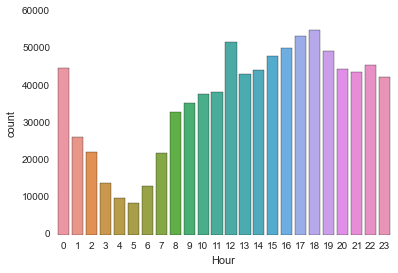

In [27]:
sns.countplot(x='Hour',data=df_train)

In [28]:
df_train.describe()

,X,Y,crime_count,Day,Month,Year,Hour
count,878049.000000,878049.000000,878049,878049.000000,878049.000000,878049.000000,878049.000000
mean,-122.422616,37.771020,1,15.570623,6.436509,2008.712046,13.412655
std,0.030354,0.456893,0,8.783005,3.428972,3.631194,6.549573
min,-122.513642,37.707879,1,1.000000,1.000000,2003.000000,0.000000
25%,-122.432952,37.752427,1,8.000000,3.000000,2006.000000,9.000000
50%,-122.416420,37.775421,1,16.000000,6.000000,2009.000000,14.000000
75%,-122.406959,37.784369,1,23.000000,9.000000,2012.000000,19.000000
max,-120.500000,90.000000,1,31.000000,12.000000,2015.000000,23.000000


In [29]:
df_train['Category'].value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

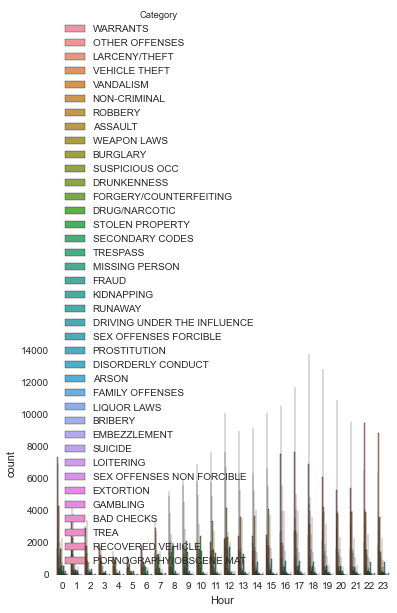

In [31]:
sns.countplot(x='Hour',hue='Category',data=df_train)

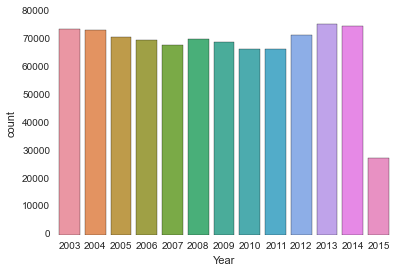

In [32]:
sns.countplot(x='Year',data=df_train)

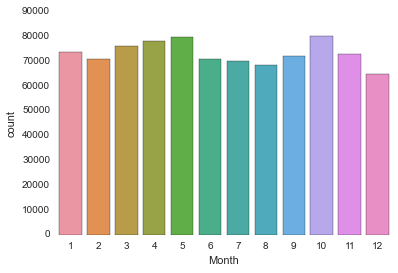

In [33]:
sns.countplot(x='Month',data=df_train)

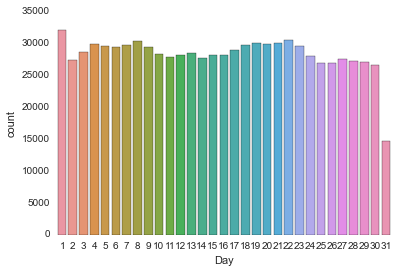

In [34]:
sns.countplot(x='Day',data=df_train)

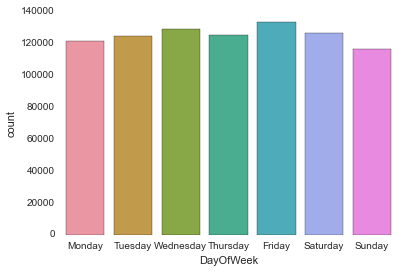

In [35]:
sns.countplot(x='DayOfWeek',data=df_train,order=day_of_week_order)

In [36]:
df_train_Assault = df_train[(df_train['Category'] == 'ASSAULT')]

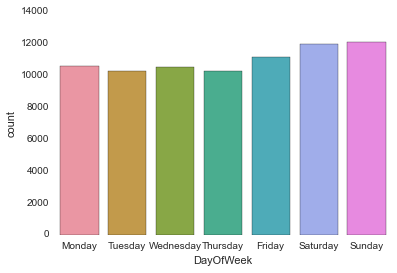

In [37]:
sns.countplot(x='DayOfWeek',data=df_train_Assault,order=day_of_week_order)

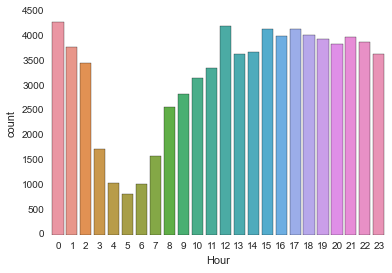

In [38]:
sns.countplot(x='Hour',data=df_train_Assault)

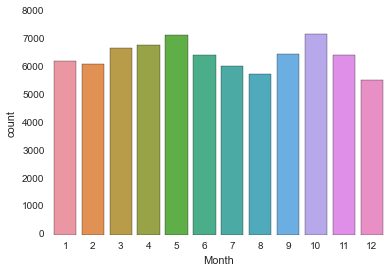

In [39]:
sns.countplot(x='Month',data=df_train_Assault)

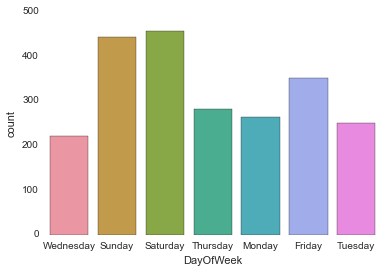

In [40]:
sns.countplot(x='DayOfWeek',data=df_train[(df_train['Category'] == 'DRIVING UNDER THE INFLUENCE')])

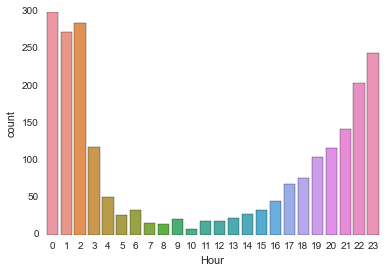

In [41]:
sns.countplot(x='Hour',data=df_train[(df_train['Category'] == 'DRIVING UNDER THE INFLUENCE')])

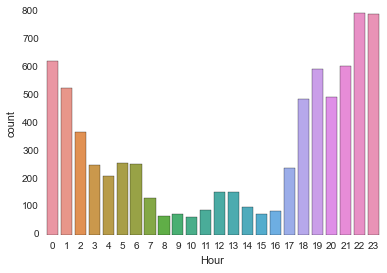

In [42]:
sns.countplot(x='Hour',data=df_train[(df_train['Category'] == 'PROSTITUTION')])

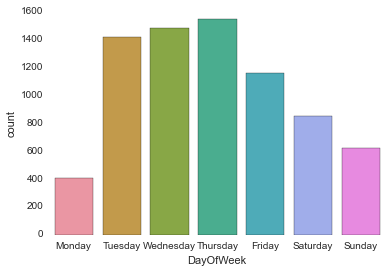

In [43]:
sns.countplot(x='DayOfWeek',data=df_train[(df_train['Category'] == 'PROSTITUTION')],order=day_of_week_order)

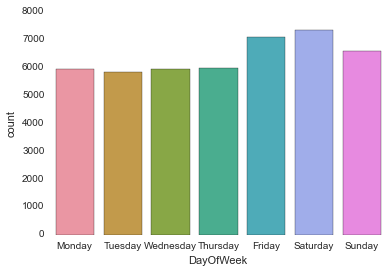

In [44]:
sns.countplot(x='DayOfWeek',data=df_train[(df_train['Category'] == 'VANDALISM')],order=day_of_week_order)

In [45]:
df_train['DayOfWeek'].value_counts()

Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: DayOfWeek, dtype: int64

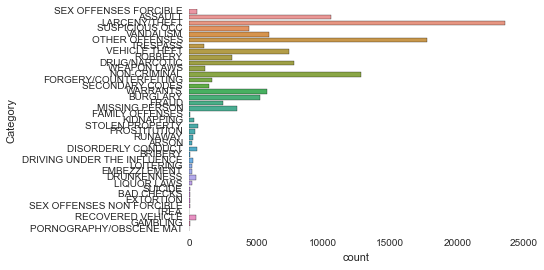

In [46]:
sns.countplot(y='Category',data=df_train[(df_train['DayOfWeek'] == 'Monday')])

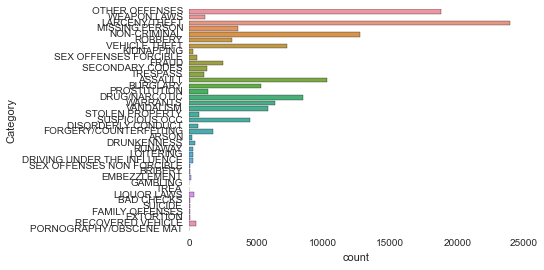

In [47]:
sns.countplot(y='Category',data=df_train[(df_train['DayOfWeek'] == 'Tuesday')])

In [48]:
cat_order = df_train.Category.value_counts()

In [49]:
cat_order

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [50]:
type(cat_order)

pandas.core.series.Series

In [51]:
for s in cat_order:
    print(s)

174900
126182
92304
76876
53971
53781
44725
42214
36755
31414
25989
23000
16679
10609
9985
8555
7484
7326
4540
4388
4320
4280
3138
2341
2268
1946
1903
1513
1225
1166
508
491
406
289
256
148
146
22
6


In [52]:
cat_order.index

Index(['LARCENY/THEFT', 'OTHER OFFENSES', 'NON-CRIMINAL', 'ASSAULT',
       'DRUG/NARCOTIC', 'VEHICLE THEFT', 'VANDALISM', 'WARRANTS', 'BURGLARY',
       'SUSPICIOUS OCC', 'MISSING PERSON', 'ROBBERY', 'FRAUD',
       'FORGERY/COUNTERFEITING', 'SECONDARY CODES', 'WEAPON LAWS',
       'PROSTITUTION', 'TRESPASS', 'STOLEN PROPERTY', 'SEX OFFENSES FORCIBLE',
       'DISORDERLY CONDUCT', 'DRUNKENNESS', 'RECOVERED VEHICLE', 'KIDNAPPING',
       'DRIVING UNDER THE INFLUENCE', 'RUNAWAY', 'LIQUOR LAWS', 'ARSON',
       'LOITERING', 'EMBEZZLEMENT', 'SUICIDE', 'FAMILY OFFENSES', 'BAD CHECKS',
       'BRIBERY', 'EXTORTION', 'SEX OFFENSES NON FORCIBLE', 'GAMBLING',
       'PORNOGRAPHY/OBSCENE MAT', 'TREA'],
      dtype='object')

In [53]:
for i in cat_order.index:
    print(i)

LARCENY/THEFT
OTHER OFFENSES
NON-CRIMINAL
ASSAULT
DRUG/NARCOTIC
VEHICLE THEFT
VANDALISM
WARRANTS
BURGLARY
SUSPICIOUS OCC
MISSING PERSON
ROBBERY
FRAUD
FORGERY/COUNTERFEITING
SECONDARY CODES
WEAPON LAWS
PROSTITUTION
TRESPASS
STOLEN PROPERTY
SEX OFFENSES FORCIBLE
DISORDERLY CONDUCT
DRUNKENNESS
RECOVERED VEHICLE
KIDNAPPING
DRIVING UNDER THE INFLUENCE
RUNAWAY
LIQUOR LAWS
ARSON
LOITERING
EMBEZZLEMENT
SUICIDE
FAMILY OFFENSES
BAD CHECKS
BRIBERY
EXTORTION
SEX OFFENSES NON FORCIBLE
GAMBLING
PORNOGRAPHY/OBSCENE MAT
TREA


In [54]:
category_order = []

In [55]:
for i in cat_order.index:
    category_order.append(i)

In [56]:
category_order

['LARCENY/THEFT',
 'OTHER OFFENSES',
 'NON-CRIMINAL',
 'ASSAULT',
 'DRUG/NARCOTIC',
 'VEHICLE THEFT',
 'VANDALISM',
 'WARRANTS',
 'BURGLARY',
 'SUSPICIOUS OCC',
 'MISSING PERSON',
 'ROBBERY',
 'FRAUD',
 'FORGERY/COUNTERFEITING',
 'SECONDARY CODES',
 'WEAPON LAWS',
 'PROSTITUTION',
 'TRESPASS',
 'STOLEN PROPERTY',
 'SEX OFFENSES FORCIBLE',
 'DISORDERLY CONDUCT',
 'DRUNKENNESS',
 'RECOVERED VEHICLE',
 'KIDNAPPING',
 'DRIVING UNDER THE INFLUENCE',
 'RUNAWAY',
 'LIQUOR LAWS',
 'ARSON',
 'LOITERING',
 'EMBEZZLEMENT',
 'SUICIDE',
 'FAMILY OFFENSES',
 'BAD CHECKS',
 'BRIBERY',
 'EXTORTION',
 'SEX OFFENSES NON FORCIBLE',
 'GAMBLING',
 'PORNOGRAPHY/OBSCENE MAT',
 'TREA']

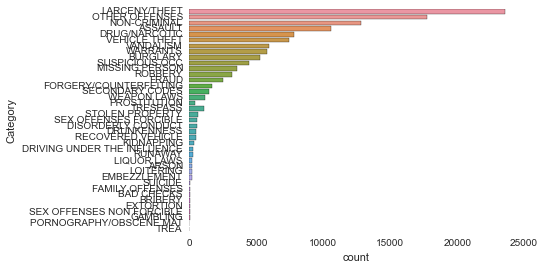

In [57]:
sns.countplot(y='Category',data=df_train[(df_train['DayOfWeek'] == 'Monday')],order=category_order)

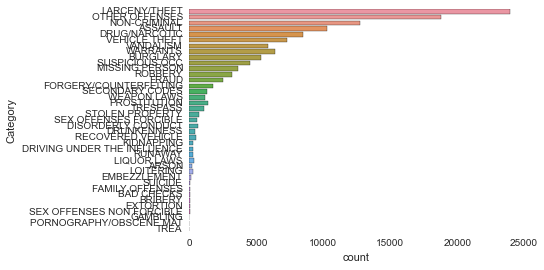

In [58]:
sns.countplot(y='Category',data=df_train[(df_train['DayOfWeek'] == 'Tuesday')],order=category_order)

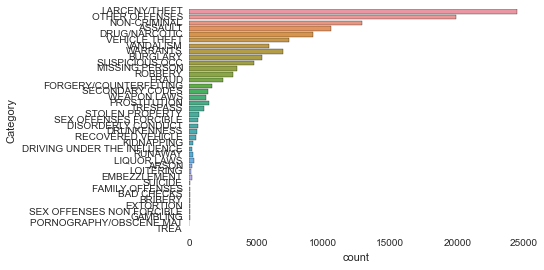

In [59]:
sns.countplot(y='Category',data=df_train[(df_train['DayOfWeek'] == 'Wednesday')],order=category_order)

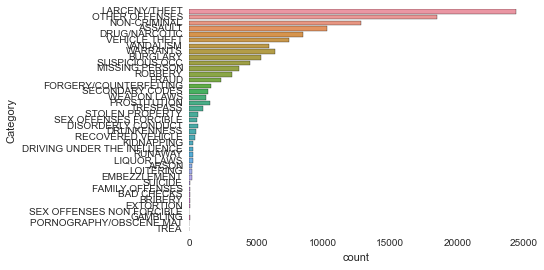

In [60]:
sns.countplot(y='Category',data=df_train[(df_train['DayOfWeek'] == 'Thursday')],order=category_order)

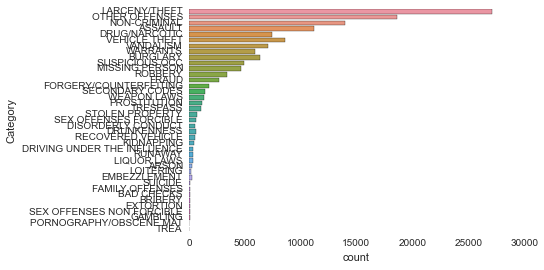

In [61]:
sns.countplot(y='Category',data=df_train[(df_train['DayOfWeek'] == 'Friday')],order=category_order)

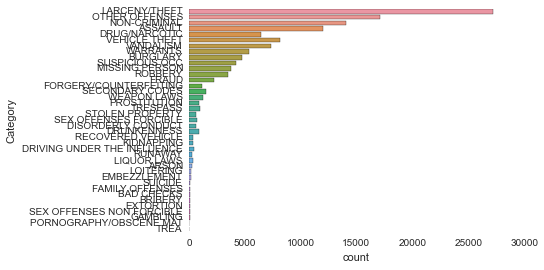

In [62]:
sns.countplot(y='Category',data=df_train[(df_train['DayOfWeek'] == 'Saturday')],order=category_order)

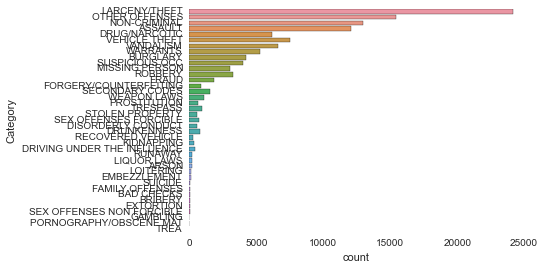

In [63]:
sns.countplot(y='Category',data=df_train[(df_train['DayOfWeek'] == 'Sunday')],order=category_order)

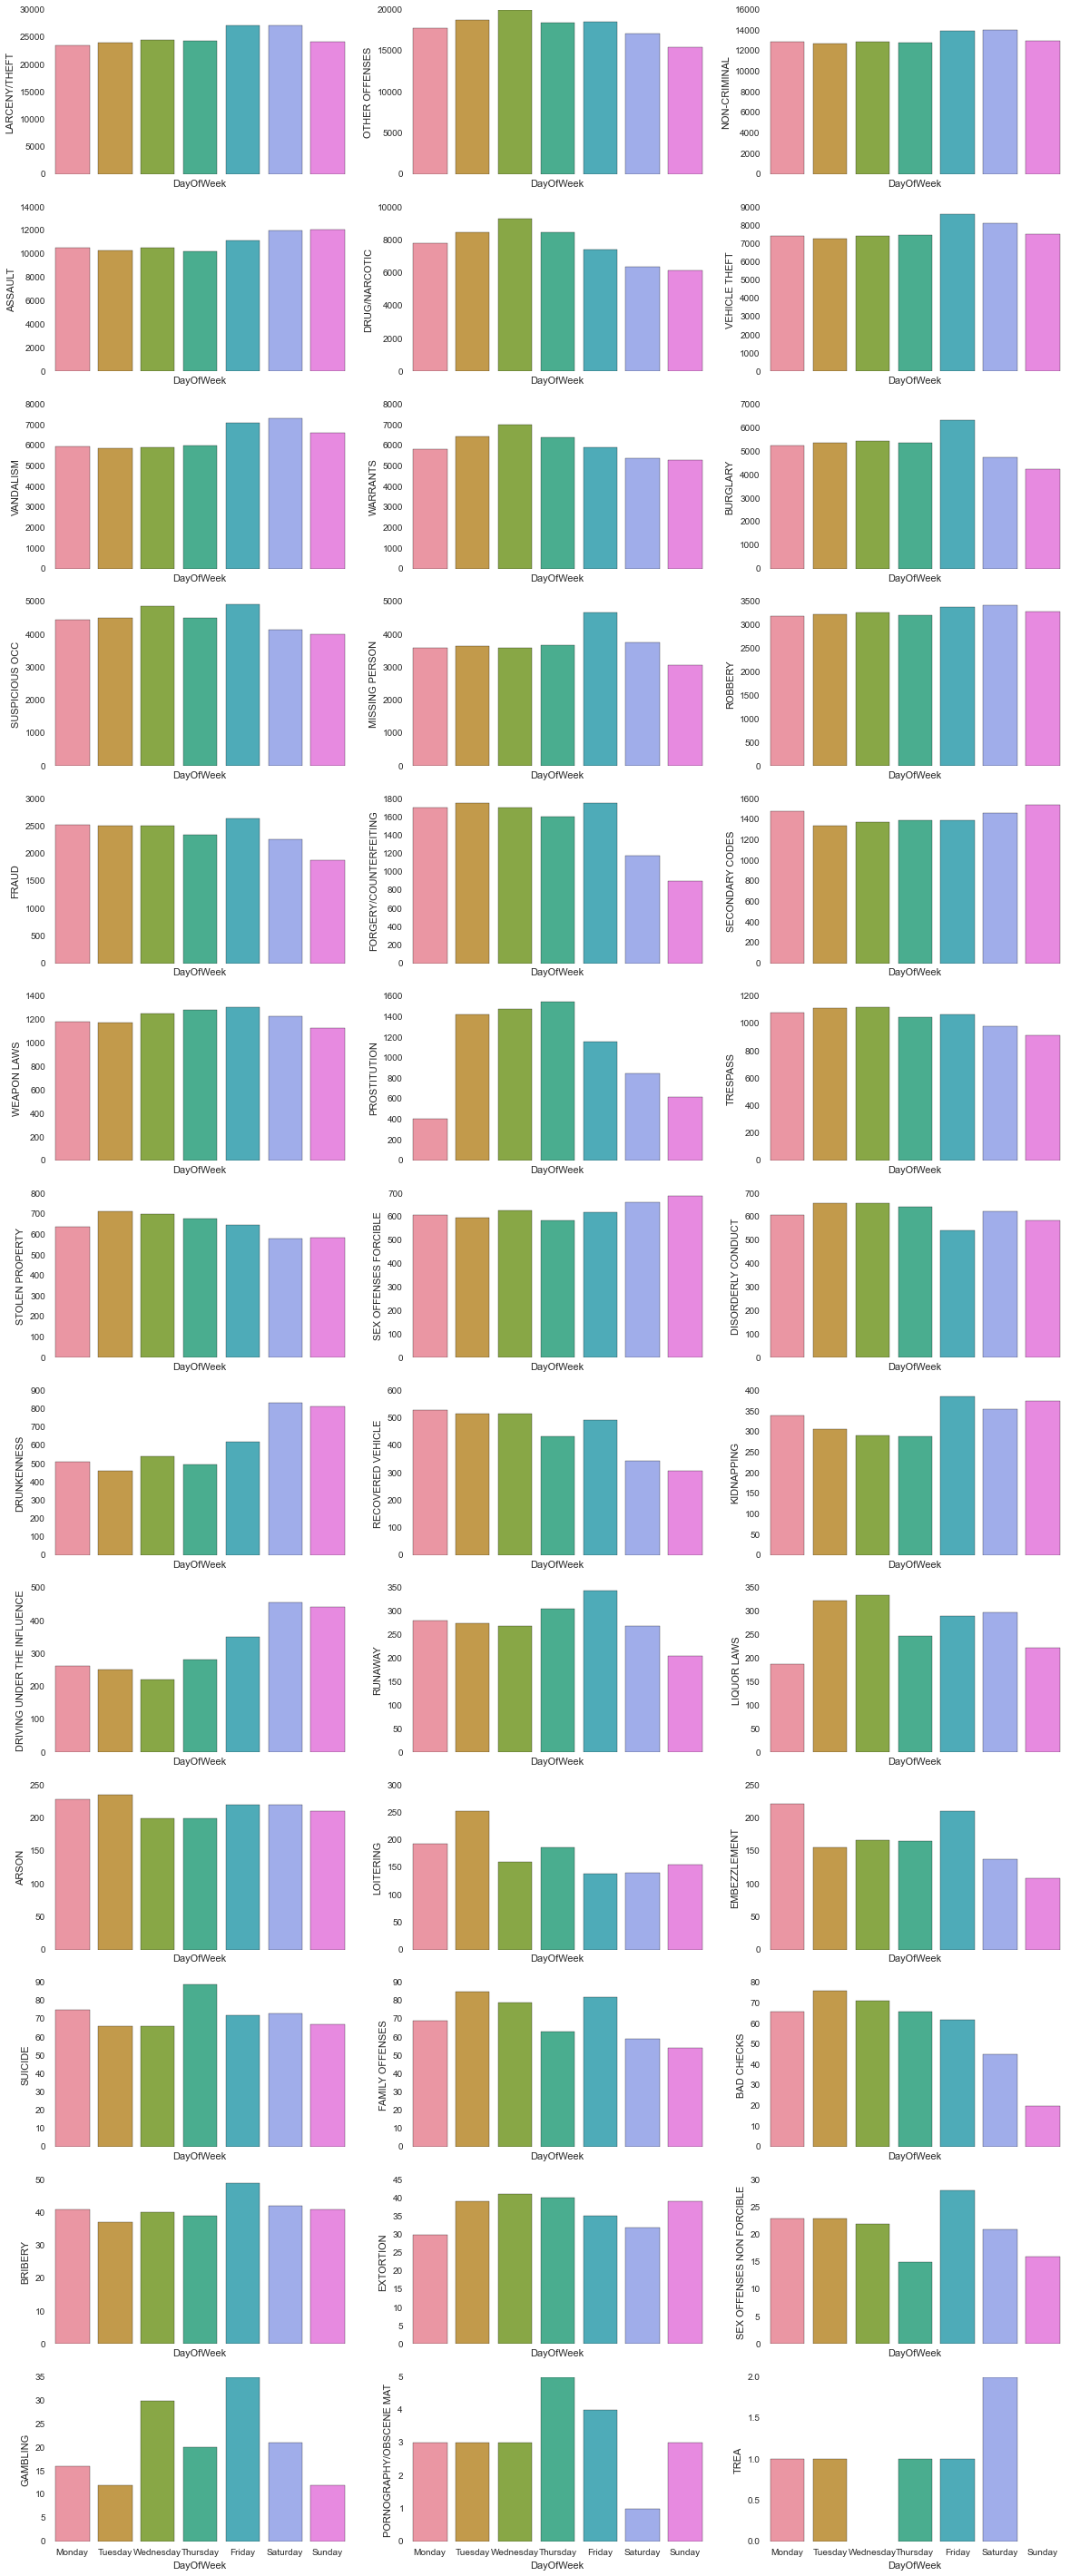

In [64]:
f, axarr = plt.subplots(13,3, sharex=True,figsize=(20,50))
count = 0
for i,x in enumerate(category_order):
    if i%3 == 0 and i != 0:
        count += 1
    i = i%3
    a = sns.countplot(x='DayOfWeek',data=df_train[(df_train['Category'] == x)],order=day_of_week_order,ax=axarr[count][i])
    a.set(ylabel=x)
plt.show()

In [65]:
df_train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,crime_count,Date,Day,Month,Year,Hour
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,1,2015-05-13,13,5,2015,23
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,1,2015-05-13,13,5,2015,23
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,1,2015-05-13,13,5,2015,23
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,1,2015-05-13,13,5,2015,23
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,1,2015-05-13,13,5,2015,23


We shall drop features Day, Month, Year, Date here due to not so significant variance found over different values

In [66]:
df_train.drop(['Day','Month','Year','Date'],axis=1,inplace=True)

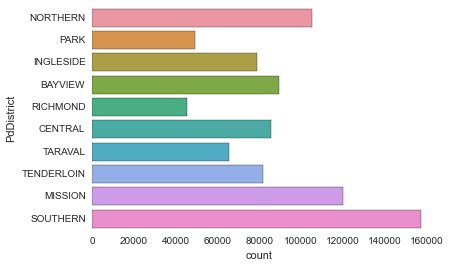

In [67]:
sns.countplot(y='PdDistrict',data=df_train)

In [68]:
pd_list = []

In [69]:
for i in df_train.PdDistrict.value_counts().index:
    pd_list.append(i)

In [70]:
pd_list

['SOUTHERN',
 'MISSION',
 'NORTHERN',
 'BAYVIEW',
 'CENTRAL',
 'TENDERLOIN',
 'INGLESIDE',
 'TARAVAL',
 'PARK',
 'RICHMOND']

In [71]:
s = df_train['crime_count'].groupby(df_train['PdDistrict']).sum()

In [72]:
s.sort(ascending=False)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  if __name__ == '__main__':


In [73]:
s

PdDistrict
SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: crime_count, dtype: int64

Checking which police dept has been active on acting on criminal activities

In [74]:
s_none = df_train[(df_train['Resolution']=='NONE')]['crime_count'].groupby(df_train['PdDistrict']).sum()

In [75]:
s_none

PdDistrict
BAYVIEW       51785
CENTRAL       60388
INGLESIDE     51047
MISSION       63056
NORTHERN      70251
PARK          30895
RICHMOND      32729
SOUTHERN      93924
TARAVAL       45018
TENDERLOIN    27697
Name: crime_count, dtype: int64

In [76]:
s_dict = {}

In [77]:
s_dict_pct = {}

In [78]:
for x,y in s.iterkv():
    s_dict[x]=y

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: FutureWarning: iterkv is deprecated and will be removed in a future release, use ``iteritems`` instead.
  if __name__ == '__main__':


In [79]:
for x,y in s_none.iterkv():
    none_pct = y/s_dict[x]
    s_dict_pct[x] = none_pct

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: FutureWarning: iterkv is deprecated and will be removed in a future release, use ``iteritems`` instead.
  if __name__ == '__main__':


In [80]:
s_dict_pct

{'BAYVIEW': 0.57904977021390791,
 'CENTRAL': 0.70662298151181835,
 'INGLESIDE': 0.64743484050986111,
 'MISSION': 0.52586983353904659,
 'NORTHERN': 0.66717634098161371,
 'PARK': 0.62650822298379738,
 'RICHMOND': 0.72394877126235924,
 'SOUTHERN': 0.59754933771042484,
 'TARAVAL': 0.68629184706384538,
 'TENDERLOIN': 0.33855688249459104}

Performed Clustering of addresses based on Street Address and applied Random Forest Algorithm but didnt get a good accuracy on test set

In [81]:
day_of_week_dummies = pd.get_dummies(df_train['DayOfWeek'])

In [82]:
pd_district_dummies = pd.get_dummies(df_train['PdDistrict'])

In [83]:
hour_dummies = pd.get_dummies(df_train['Hour'])

In [84]:
category_order = []

In [85]:
for i in df_train['Category'].value_counts().index:
    category_order.append(i)

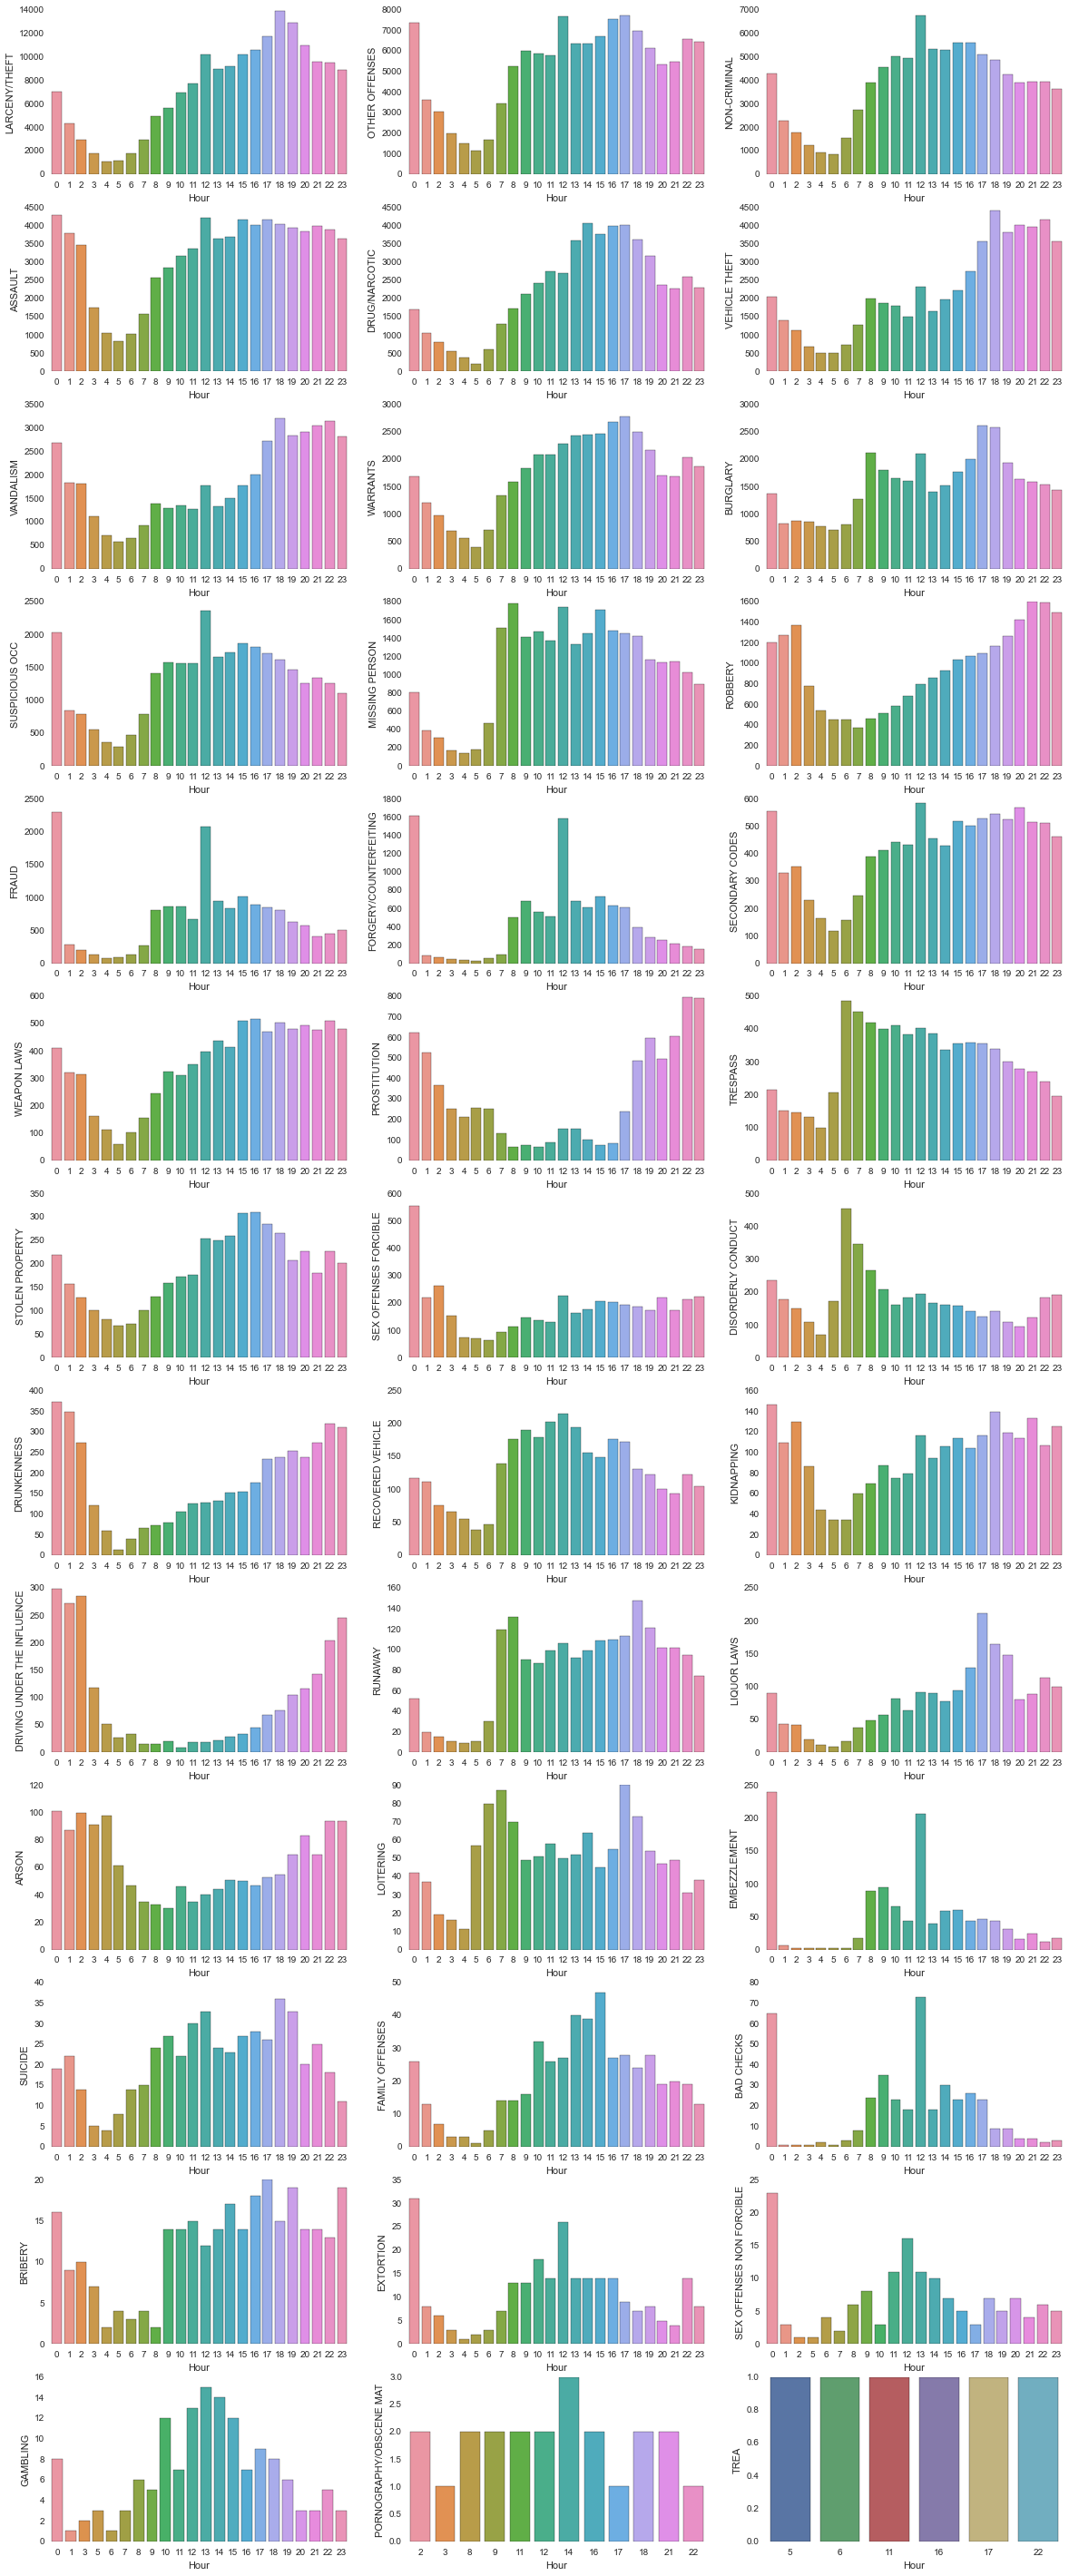

In [86]:
f, axarr = plt.subplots(13,3,figsize=(20,50))
count = 0
for i,x in enumerate(category_order):
    if i%3 == 0 and i != 0:
        count += 1
    i = i%3
    a = sns.countplot(x='Hour',data=df_train[(df_train['Category'] == x)],ax=axarr[count][i])
    a.set(ylabel=x)
plt.show()

In [87]:
# can think of clubbing hour to hour blocks

In [88]:
df_arr = [df_train,pd_district_dummies,day_of_week_dummies,hour_dummies]

In [89]:
df_train = pd.concat(df_arr,axis=1)

In [90]:
df_train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,crime_count,...,14,15,16,17,18,19,20,21,22,23
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,1,...,0,0,0,0,0,0,0,0,0,1
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,1,...,0,0,0,0,0,0,0,0,0,1
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,1,...,0,0,0,0,0,0,0,0,0,1
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,1,...,0,0,0,0,0,0,0,0,0,1
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,1,...,0,0,0,0,0,0,0,0,0,1


In [91]:
df_target = df_train['Category']

In [92]:
df_train.to_csv('df_train_new.csv',index=False)

In [2]:
df_new = pd.read_csv('df_train_new.csv')

In [140]:
df_new

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,crime_count,...,14,15,16,17,18,19,20,21,22,23
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,1,...,0,0,0,0,0,0,0,0,0,1
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,1,...,0,0,0,0,0,0,0,0,0,1
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,1,...,0,0,0,0,0,0,0,0,0,1
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,1,...,0,0,0,0,0,0,0,0,0,1
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,1,...,0,0,0,0,0,0,0,0,0,1
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,1,...,0,0,0,0,0,0,0,0,0,1
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138,1,...,0,0,0,0,0,0,0,0,0,1
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,1,...,0,0,0,0,0,0,0,0,0,1
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601,1,...,0,0,0,0,0,0,0,0,0,1
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802,1,...,0,0,0,0,0,0,0,0,0,1


In [5]:
hour_dummies = pd.get_dummies(df_new['Hour'])

In [6]:
hour_dummies

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
hour_cols_list = hour_dummies.columns.tolist()

In [13]:
hour_cols_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [14]:
hour_cols_list = [str(s) for s in hour_cols_list]

In [15]:
df_new = df_new.drop(hour_cols_list,axis=1)

In [16]:
df_new

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,crime_count,...,SOUTHERN,TARAVAL,TENDERLOIN,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,1,...,0,0,0,0,0,0,0,0,0,1
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,1,...,0,0,0,0,0,0,0,0,0,1
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,1,...,0,0,0,0,0,0,0,0,0,1
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,1,...,0,0,0,0,0,0,0,0,0,1
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,1,...,0,0,0,0,0,0,0,0,0,1
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,1,...,0,0,0,0,0,0,0,0,0,1
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138,1,...,0,0,0,0,0,0,0,0,0,1
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,1,...,0,0,0,0,0,0,0,0,0,1
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601,1,...,0,0,0,0,0,0,0,0,0,1
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802,1,...,0,0,0,0,0,0,0,0,0,1


In [17]:
df_new_1 = df_new.loc[np.random.choice(df_new.index, 50000, replace=False)]

In [18]:
df_new_1.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,crime_count,...,SOUTHERN,TARAVAL,TENDERLOIN,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
758570,2004-08-05 21:00:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Thursday,TARAVAL,NONE,1600 Block of 40TH AV,-122.499098,37.756024,1,...,0,1,0,0,0,0,0,1,0,0
819195,2003-10-15 10:05:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Wednesday,BAYVIEW,"ARREST, CITED",OAKDALE AV / NEWHALL ST,-122.392217,37.735663,1,...,0,0,0,0,0,0,0,0,0,1
537881,2007-10-07 09:00:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,RICHMOND,NONE,9TH AV / CLEMENT ST,-122.467630,37.782801,1,...,0,0,0,0,0,0,1,0,0,0
449028,2009-01-19 11:54:00,ASSAULT,BATTERY,Monday,MISSION,NONE,23RD ST / SAN BRUNO AV,-122.404485,37.754397,1,...,0,0,0,0,1,0,0,0,0,0
857471,2003-04-14 02:10:00,OTHER OFFENSES,VIOLATION OF RESTRAINING ORDER,Monday,INGLESIDE,"ARREST, BOOKED",3700 Block of MISSION ST,-122.424284,37.736385,1,...,0,0,0,0,1,0,0,0,0,0


In [19]:
df_new_1.Category.value_counts()

LARCENY/THEFT                  10095
OTHER OFFENSES                  7238
NON-CRIMINAL                    5222
ASSAULT                         4288
VEHICLE THEFT                   3080
DRUG/NARCOTIC                   3025
VANDALISM                       2575
WARRANTS                        2429
BURGLARY                        2100
SUSPICIOUS OCC                  1753
MISSING PERSON                  1465
ROBBERY                         1284
FRAUD                            962
FORGERY/COUNTERFEITING           601
SECONDARY CODES                  559
WEAPON LAWS                      539
PROSTITUTION                     425
TRESPASS                         394
STOLEN PROPERTY                  265
DISORDERLY CONDUCT               258
SEX OFFENSES FORCIBLE            249
DRUNKENNESS                      241
RECOVERED VEHICLE                186
KIDNAPPING                       130
DRIVING UNDER THE INFLUENCE      118
LIQUOR LAWS                      101
RUNAWAY                           94
A

In [20]:
df_new_1 = df_new_1[(df_new_1['Category'] != 'SEX OFFENSES NON FORCIBLE')&(df_new_1['Category'] != 'PORNOGRAPHY/OBSCENE MAT')&(df_new_1['Category'] != 'TREA')]

In [21]:
df_new_1

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,crime_count,...,SOUTHERN,TARAVAL,TENDERLOIN,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
758570,2004-08-05 21:00:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Thursday,TARAVAL,NONE,1600 Block of 40TH AV,-122.499098,37.756024,1,...,0,1,0,0,0,0,0,1,0,0
819195,2003-10-15 10:05:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Wednesday,BAYVIEW,"ARREST, CITED",OAKDALE AV / NEWHALL ST,-122.392217,37.735663,1,...,0,0,0,0,0,0,0,0,0,1
537881,2007-10-07 09:00:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,RICHMOND,NONE,9TH AV / CLEMENT ST,-122.467630,37.782801,1,...,0,0,0,0,0,0,1,0,0,0
449028,2009-01-19 11:54:00,ASSAULT,BATTERY,Monday,MISSION,NONE,23RD ST / SAN BRUNO AV,-122.404485,37.754397,1,...,0,0,0,0,1,0,0,0,0,0
857471,2003-04-14 02:10:00,OTHER OFFENSES,VIOLATION OF RESTRAINING ORDER,Monday,INGLESIDE,"ARREST, BOOKED",3700 Block of MISSION ST,-122.424284,37.736385,1,...,0,0,0,0,1,0,0,0,0,0
158045,2013-04-07 15:00:00,MISSING PERSON,MISSING ADULT,Sunday,PARK,LOCATED,1800 Block of WALLER ST,-122.454330,37.768153,1,...,0,0,0,0,0,0,1,0,0,0
507342,2008-03-20 00:01:00,NON-CRIMINAL,"DEATH REPORT, CAUSE UNKNOWN",Thursday,TENDERLOIN,NONE,300 Block of EDDY ST,-122.413791,37.783837,1,...,0,0,1,0,0,0,0,1,0,0
496945,2008-05-14 16:15:00,DRUG/NARCOTIC,POSSESSION OF MARIJUANA,Wednesday,PARK,"ARREST, BOOKED",1800 Block of HAIGHT ST,-122.452706,37.769216,1,...,0,0,0,0,0,0,0,0,0,1
560212,2007-06-15 11:30:00,NON-CRIMINAL,FOUND PROPERTY,Friday,NORTHERN,DISTRICT ATTORNEY REFUSES TO PROSECUTE,2500 Block of LOMBARD ST,-122.443520,37.798999,1,...,0,0,0,1,0,0,0,0,0,0
547609,2007-08-22 12:14:00,TRESPASS,TRESPASSING,Wednesday,BAYVIEW,"ARREST, BOOKED",0 Block of DOUBLEROCK ST,-122.387695,37.720555,1,...,0,0,0,0,0,0,0,0,0,1


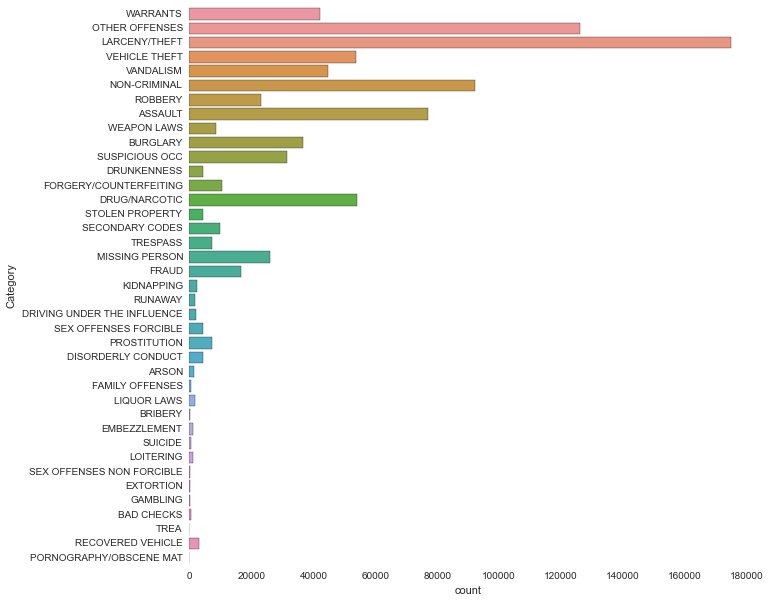

In [162]:
f,axarr = plt.subplots(1,1,figsize=(10,10))
a = sns.countplot(y='Category',data=df_new,ax=axarr)
plt.show()

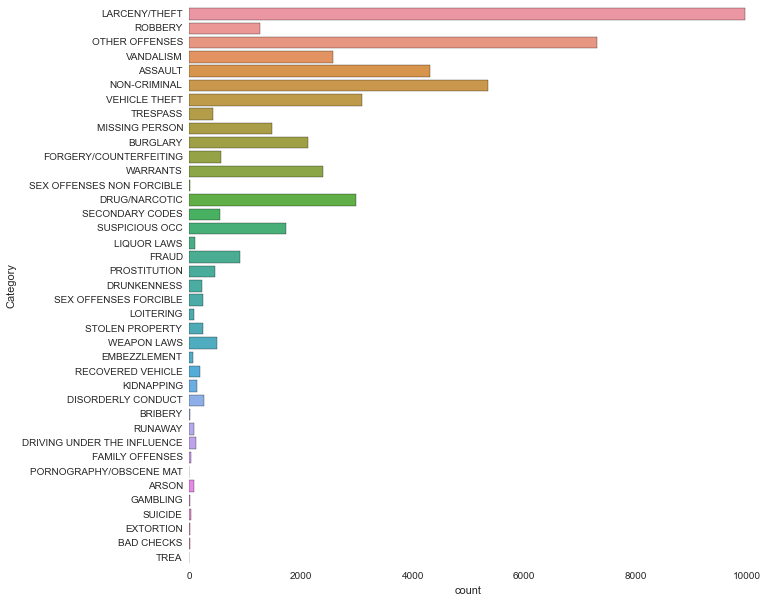

In [163]:
f,axarr = plt.subplots(1,1,figsize=(10,10))
a = sns.countplot(y='Category',data=df_new_1,ax=axarr)
plt.show()

In [22]:
df_target_new = df_new_1['Category']

In [23]:
df_target_new.head()

758570         VANDALISM
819195    OTHER OFFENSES
537881     VEHICLE THEFT
449028           ASSAULT
857471    OTHER OFFENSES
Name: Category, dtype: object

In [24]:
cols_to_drop = ['Dates','Category','Descript','DayOfWeek','PdDistrict','Resolution','Address','X','Y','crime_count','Hour']

In [25]:
df_new_1.drop(cols_to_drop,axis=1,inplace=True)

In [26]:
df_new_1.head()

,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
758570,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
819195,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
537881,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
449028,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
857471,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


# Model Selection

In [27]:
from sklearn.grid_search import GridSearchCV

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [28]:
from sklearn.ensemble import RandomForestClassifier

#neg_log_loss

#Random Forest

In [35]:
n_estimators_list = [500,1000,]

In [ ]:
max_depth_list = [5,8,15,25,30,None]

In [36]:
parameters = {'n_estimators':n_estimators_list }

In [37]:
rfr = RandomForestClassifier(n_jobs=-1)

In [38]:
grid = GridSearchCV(rfr,parameters,cv=5,scoring='neg_log_loss')

In [39]:
X_train = df_new_1

In [40]:
y_train = df_target_new

In [41]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [500, 1000]}, pre_dispatch='2*n_jobs',
       refit=True, scoring='neg_log_loss', verbose=0)

In [92]:
grid.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
grid.best_params_

{'n_estimators': 1000}

In [104]:
rfr_model = RandomForestClassifier(n_estimators=1000)

In [105]:
rfr_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [106]:
rfr_model_file = 'rfr_model.sav'

In [44]:
grid.best_score_

-2.829115596963245

In [95]:
import pickle

In [109]:
pickle.dump(rfr_model, open(rfr_model_file, 'wb'))

#Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [49]:
log_reg = LogisticRegression()

In [50]:
penalty_list = ['l1','l2']

In [54]:
c_list = [0.01,0.1]

In [55]:
parameters = {'penalty':penalty_list,'C':c_list }

In [56]:
grid = GridSearchCV(log_reg,parameters,cv=5,scoring='neg_log_loss')

In [57]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, scoring='neg_log_loss',
       verbose=0)

In [58]:
grid.best_score_

-2.6108324469238675

In [59]:
grid.best_params_

{'C': 0.1, 'penalty': 'l1'}

In [60]:
grid.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
log_reg_model = grid.best_estimator_

In [61]:
log_reg_model_file = 'log_reg_model.sav'

In [64]:
import pickle

In [65]:
pickle.dump(log_reg_model, open(log_reg_model_file, 'wb'))

#Test Dataset

In [80]:
df_test = pd.read_csv('test.csv')

In [81]:
df_test

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
5,5,2015-05-10 23:40:00,Sunday,TARAVAL,BROAD ST / CAPITOL AV,-122.459024,37.713172
6,6,2015-05-10 23:30:00,Sunday,INGLESIDE,100 Block of CHENERY ST,-122.425616,37.739351
7,7,2015-05-10 23:30:00,Sunday,INGLESIDE,200 Block of BANKS ST,-122.412652,37.739750
8,8,2015-05-10 23:10:00,Sunday,MISSION,2900 Block of 16TH ST,-122.418700,37.765165
9,9,2015-05-10 23:10:00,Sunday,CENTRAL,TAYLOR ST / GREEN ST,-122.413935,37.798886


In [82]:
day_of_week_dummies = pd.get_dummies(df_test['DayOfWeek'])

In [83]:
pd_district_dummies = pd.get_dummies(df_test['PdDistrict'])

In [84]:
df_test['Dates'] = df_test['Dates'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

In [85]:
df_test['Hour'] = df_test['Dates'].apply(lambda x : x.hour)

In [86]:
df_test_arr = [df_test,pd_district_dummies,day_of_week_dummies]

In [87]:
df_test = pd.concat(df_test_arr,axis=1)

In [88]:
test_cols_to_drop = ['Dates','DayOfWeek','PdDistrict','Address','X','Y','Hour','Id']

In [89]:
df_test = df_test.drop(test_cols_to_drop,axis=1)

In [90]:
df_test.head()

,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


#Testing Model

In [99]:
X_test = df_test

#Random Forest

In [110]:
rfr_model_test = pickle.load(open('rfr_model.sav','rb'))

In [ ]:
y_test = rfr_model_test.predict(X_test)

#Logistic Regression

In [101]:
log_reg_model_test = pickle.load(open('log_reg_model.sav','rb'))

In [102]:
y_log_reg_test = log_reg_model_test.predict(X_test)

In [103]:
y_log_reg_test

array(['OTHER OFFENSES', 'OTHER OFFENSES', 'LARCENY/THEFT', ...,
       'OTHER OFFENSES', 'OTHER OFFENSES', 'LARCENY/THEFT'], dtype=object)